<a href="https://colab.research.google.com/github/stephintoto/ICT-ASSIGNMENTS/blob/main/unsup_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/fish.csv')


In [4]:
df.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


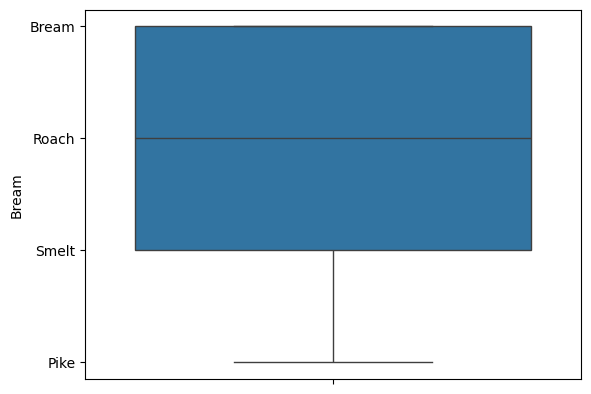

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


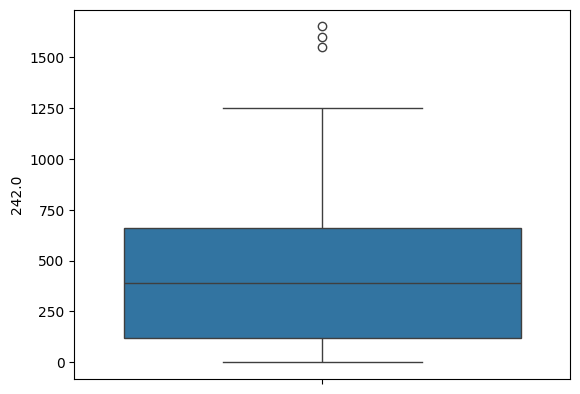

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


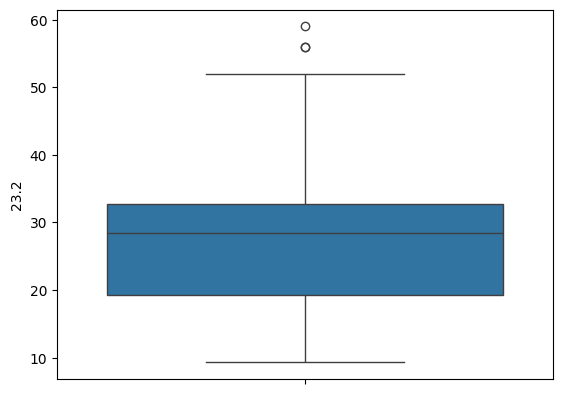

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


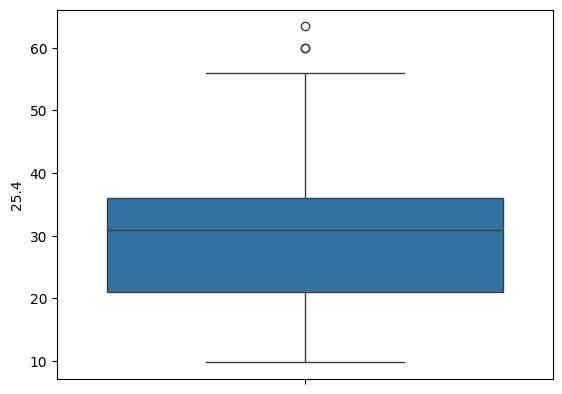

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


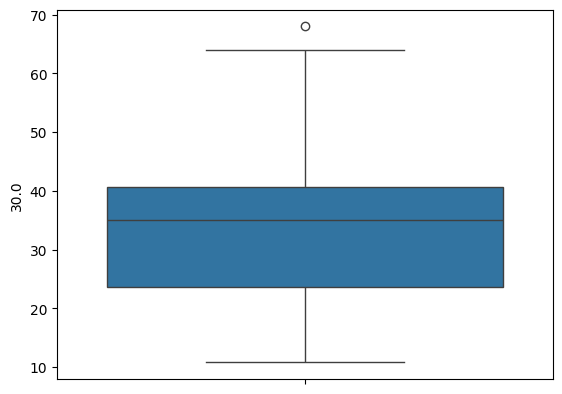

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


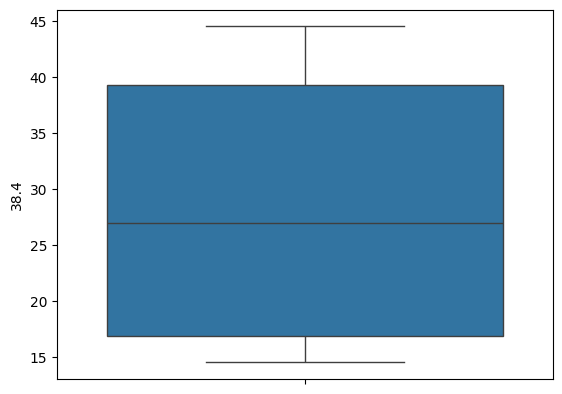

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


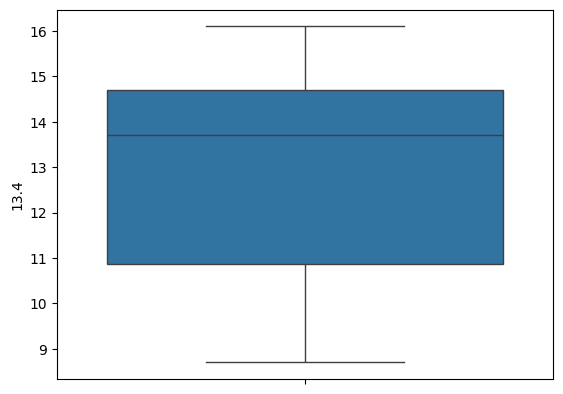

In [8]:

for col in df.columns:
  sns.boxplot(data= df[col])
  plt.show()


In [11]:
outlier_columns = []
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    if df[col].min() < lower_limit or df[col].max() > upper_limit:
      outlier_columns.append(col)
print(outlier_columns)

['242.0', '23.2', '25.4', '30.0']


In [13]:
for col in outlier_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower = lower_limit, upper = upper_limit)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


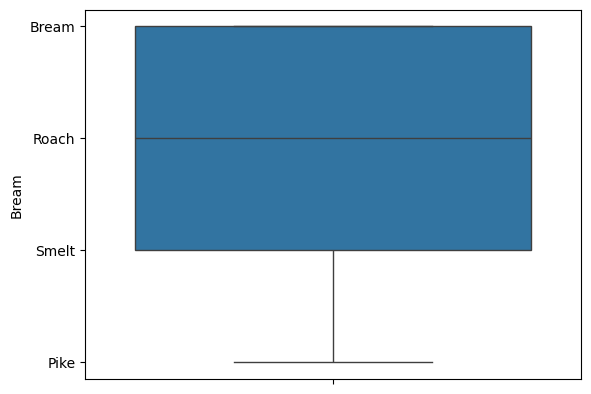

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


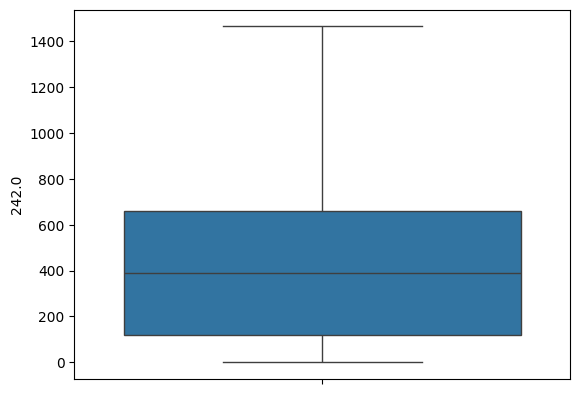

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


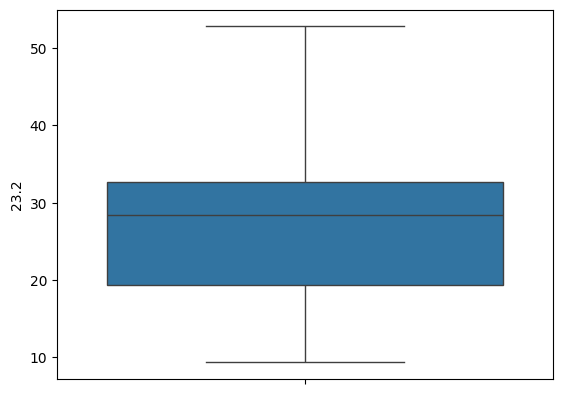

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


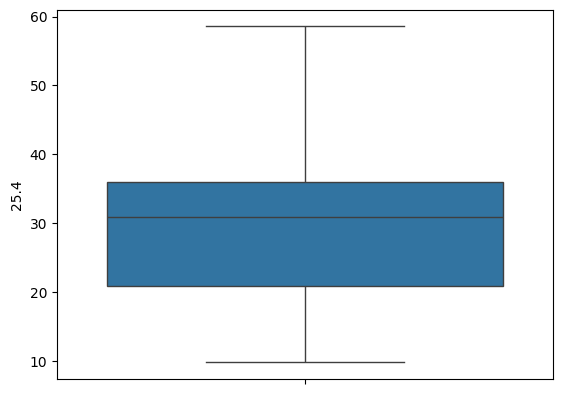

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


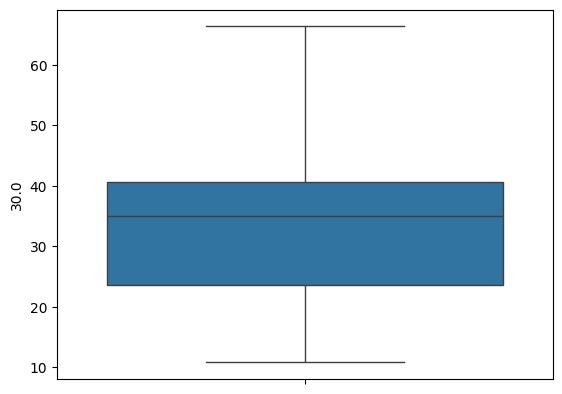

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


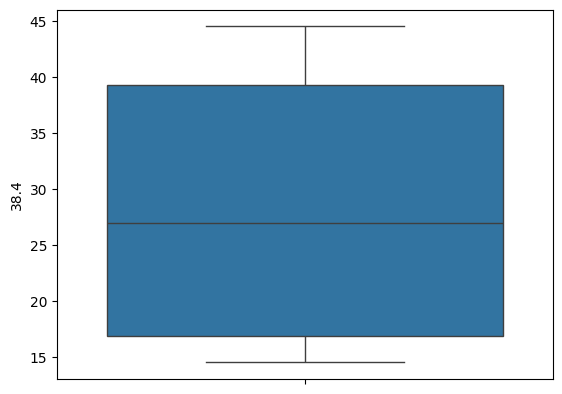

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


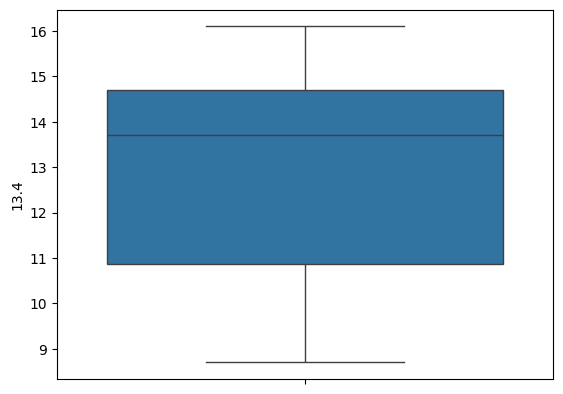

In [16]:
for col in df.columns:
  sns.boxplot(data = df[col])
  plt.show()

In [17]:

columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
df.columns = columns
X = df[['Weight', 'Length1']]
X.isnull().sum()
X_clean = X.dropna()
X_clean.head()

,Weight,Length1
0,290.0,24.0
1,340.0,23.9
2,363.0,26.3
3,430.0,26.5
4,450.0,26.8


In [19]:

from sklearn.preprocessing import StandardScaler
numeric_data = df.select_dtypes(include=['number'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(numeric_data)

In [20]:
data_scaled = pd.DataFrame(x_scaled, columns=numeric_data.columns)
data_scaled

,Weight,Length1,Length2,Length3,Height,Width
0,-0.380263,-0.296988,-0.269256,-0.147434,1.170768,0.444320
1,-0.243627,-0.306157,-0.252510,-0.155043,1.151330,1.058494
2,-0.180774,-0.086097,-0.043186,0.027571,0.976392,0.208099
3,0.002318,-0.067759,-0.043186,0.065616,0.840329,1.058494
4,0.056972,-0.040252,0.015425,0.118878,1.093017,0.633297
...,...,...,...,...,...,...
79,1.423331,1.931118,1.857480,1.671099,-1.142305,-0.784028
80,2.243147,2.270377,2.217518,2.021109,-0.977086,-0.547807
81,2.827265,2.346023,2.433122,2.348293,-1.258931,-1.539934
82,2.827265,2.346023,2.433122,2.348293,-1.258931,-1.539934


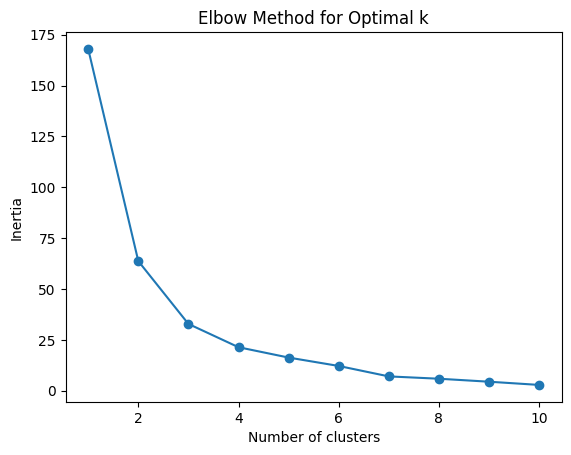

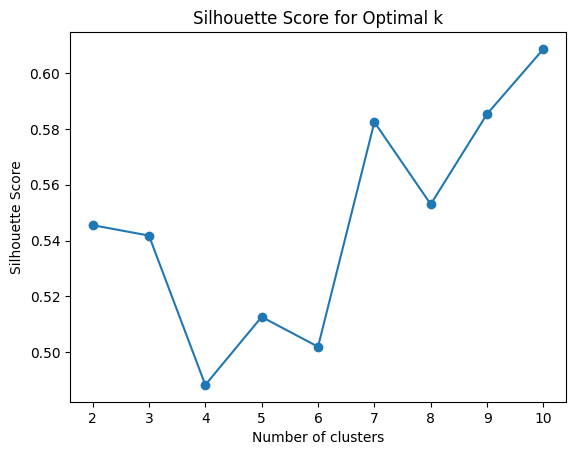

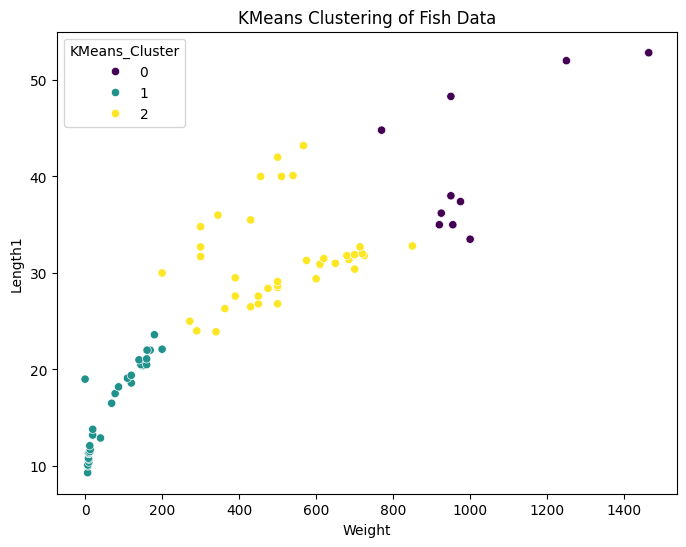

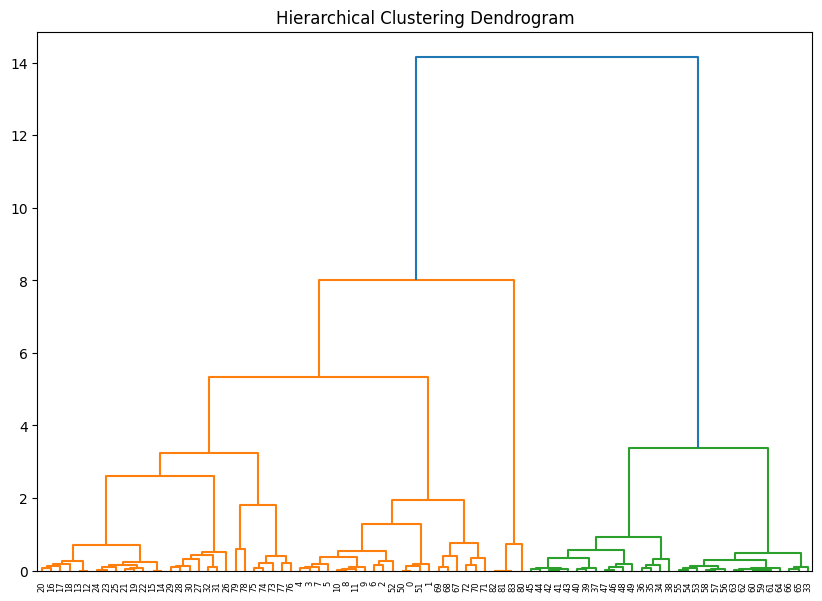

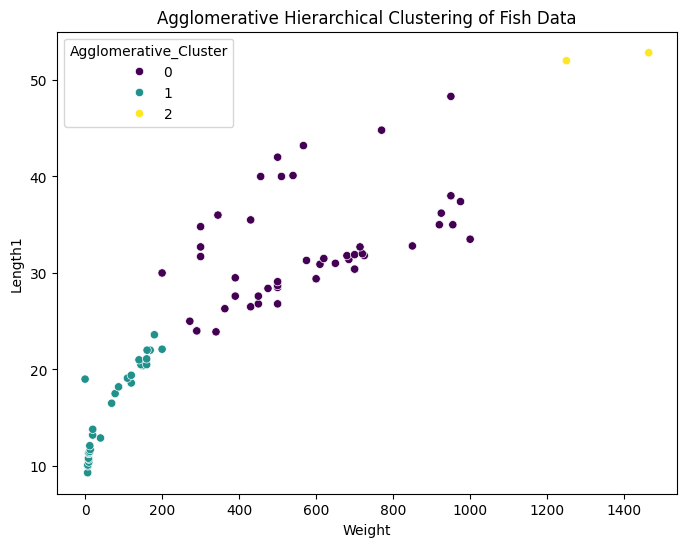

In [21]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns


X = df[['Weight', 'Length1']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = kmeans_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Length1', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('KMeans Clustering of Fish Data')
plt.show()



linked = linkage(X_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)

df['Agglomerative_Cluster'] = agg_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Length1', hue='Agglomerative_Cluster', data=df, palette='viridis')
plt.title('Agglomerative Hierarchical Clustering of Fish Data')
plt.show()
